<a href="https://colab.research.google.com/github/popson92/HASC2021/blob/main/stageE_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
pwd

'/content'

In [ ]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/household_power_consumption.txt', sep=';', infer_datetime_format=True, 
                 parse_dates={'datetime':[0,1]}, index_col=['datetime'],na_values = '?', dtype = float)

In [ ]:
df.head(5)

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [ ]:
df_daily = df.resample('D').mean()

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    1433 non-null   float64
 1   Global_reactive_power  1433 non-null   float64
 2   Voltage                1433 non-null   float64
 3   Global_intensity       1433 non-null   float64
 4   Sub_metering_1         1433 non-null   float64
 5   Sub_metering_2         1433 non-null   float64
 6   Sub_metering_3         1433 non-null   float64
dtypes: float64(7)
memory usage: 90.1 KB


In [ ]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [ ]:
df_daily.isnull().sum()

Global_active_power      9
Global_reactive_power    9
Voltage                  9
Global_intensity         9
Sub_metering_1           9
Sub_metering_2           9
Sub_metering_3           9
dtype: int64

In [ ]:
for j in range(0,7):        
  df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [ ]:
df.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.247017,-0.399762,0.998889,0.484401,0.434569,0.638555
Global_reactive_power,0.247017,1.000000,-0.112246,0.266120,0.123111,0.139231,0.089617
Voltage,-0.399762,-0.112246,1.000000,-0.411363,-0.195976,-0.167405,-0.268172
Global_intensity,0.998889,0.266120,-0.411363,1.000000,0.489298,0.440347,0.626543
Sub_metering_1,0.484401,0.123111,-0.195976,0.489298,1.000000,0.054721,0.102571
Sub_metering_2,0.434569,0.139231,-0.167405,0.440347,0.054721,1.000000,0.080872
Sub_metering_3,0.638555,0.089617,-0.268172,0.626543,0.102571,0.080872,1.000000


In [ ]:
for j in range(0,7):        
  df_daily.iloc[:,j]=df_daily.iloc[:,j].fillna(df_daily.iloc[:,j].mean())

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1442 entries, 2006-12-16 to 2010-11-26
Freq: D
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    1442 non-null   float64
 1   Global_reactive_power  1442 non-null   float64
 2   Voltage                1442 non-null   float64
 3   Global_intensity       1442 non-null   float64
 4   Sub_metering_1         1442 non-null   float64
 5   Sub_metering_2         1442 non-null   float64
 6   Sub_metering_3         1442 non-null   float64
dtypes: float64(7)
memory usage: 90.1 KB


In [ ]:
df_daily.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Global_active_power,1.000000,0.039504,0.111052,0.999187,0.541115,0.474655,0.728800
Global_reactive_power,0.039504,1.000000,-0.055753,0.060933,0.322859,0.183405,0.028143
Voltage,0.111052,-0.055753,1.000000,0.085400,-0.070000,-0.078775,0.172435
Global_intensity,0.999187,0.060933,0.085400,1.000000,0.553015,0.483713,0.720247
Sub_metering_1,0.541115,0.322859,-0.070000,0.553015,1.000000,0.249159,0.301549
Sub_metering_2,0.474655,0.183405,-0.078775,0.483713,0.249159,1.000000,0.196551
Sub_metering_3,0.728800,0.028143,0.172435,0.720247,0.301549,0.196551,1.000000


In [ ]:
df_daily.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972


In [ ]:
df_daily.reset_index(inplace=True)

In [ ]:
df_daily = df_daily.rename(columns={"datetime": "ds", "Global_active_power": "y"})

In [ ]:
df_daily = df_daily[['ds','y']]

In [ ]:
train, test = df_daily[:len(df_daily)-365], df_daily[len(df_daily)-365:]

In [ ]:
np.abs(forecast[['yhat']][1077:] - test[['y']])

,y,yhat
1077,NaN,NaN
1078,NaN,NaN
1079,NaN,NaN
1080,NaN,NaN
1081,NaN,NaN
...,...,...
1437,NaN,NaN
1438,NaN,NaN
1439,NaN,NaN
1440,NaN,NaN


In [ ]:
from fbprophet import Prophet
m = Prophet()
m.fit(train)

future = m.make_future_dataframe(periods=365, freq='D')
forecast = m.predict(future)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
mape = np.mean(np.abs((test[['y']].values - forecast[['yhat']].values[len(df_daily)-365:]) / test[['y']].values)) * 100
print(mape)

21.454888235524


In [ ]:
import math
MSE = np.square(test[['y']].values - forecast[['yhat']].values[len(df_daily)-365:]).mean() 

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.27041835844689716


In [ ]:
len(df_daily)-

1442

In [ ]:
train, test = df_daily[:len(df_daily)-365], df_daily[len(df_daily)-365:]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
datetime,,,,,,,
2006-12-16,3.053475,0.088187,236.243763,13.082828,0.000000,1.378788,12.439394
2006-12-17,2.354486,0.156949,240.087028,9.999028,1.411806,2.907639,9.264583
2006-12-18,1.530435,0.112356,241.231694,6.421667,0.738194,1.820139,9.734722
2006-12-19,1.157079,0.104821,241.999313,4.926389,0.582639,5.279167,4.303472
2006-12-20,1.545658,0.111804,242.308063,6.467361,0.000000,1.838889,9.765972
...,...,...,...,...,...,...,...
2009-11-22,1.702067,0.154610,241.077701,7.193194,4.704167,0.285417,11.178472
2009-11-23,1.021613,0.103012,242.742715,4.236667,0.000000,0.279167,5.715278
2009-11-24,1.478372,0.106819,241.976528,6.179861,1.729861,3.179861,6.309722


Text(0, 0.5, 'Passengers')

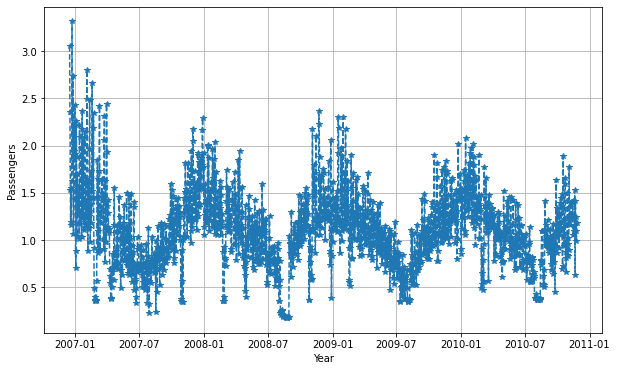

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(df_daily.index, df_daily.Global_active_power, '--', marker='*', )
plt.grid()
plt.xlabel('Year')
plt.ylabel('Passengers')

0

In [ ]:
0.04*2

0.08

In [ ]:
# eq1 = (df['Global_active_power']*1000/60) 
# eq2 = df['Sub_metering_1'] + df['Sub_metering_2'] + df['Sub_metering_3']
# df['power_consumption'] = eq1 - eq2
# df.head()

In [ ]:
# plt.figure(figsize=(10,6))
# plt.plot(df_quarterly.index, df_quarterly['Global_active_power'], '--', marker='*', )
# plt.grid()

In [ ]:
# df = df.interpolate(method='linear', limit_direction='forward')

In [ ]:
# df = df.drop_duplicates(keep = 'first')

In [ ]:
df.duplicated().sum()

0

In [ ]:
# split = int(0.75 * len(sampled_df))
# sampled_train, sampled_test = sampled_df[:split], sampled_df[split:]

# plot_acf(sampled_train.Global_reactive_power, lags=30, zero=False)
# plot_pacf(sampled_train.Global_reactive_power, lags=30, zero=False)
